In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df=pd.read_csv(filepath, header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [3]:
hd=['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns=hd
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


In [4]:
df['age'].replace('?',np.nan, inplace=True)
df['smoker'].replace('?',np.nan, inplace=True)

In [5]:
lib={}
count=0
for i in df:
    count=0
    for j in df[i]:
        if j=='?':
            count+=1
            lib[i]=count
print(lib)

{}


In [6]:
df.replace('?',np.nan,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [8]:
df.describe(include='all')

,age,gender,bmi,no_of_children,smoker,region,charges
count,2768,2772.000000,2772.000000,2772.000000,2765,2772.000000,2772.000000
unique,47,NaN,NaN,NaN,2,NaN,NaN
top,18,NaN,NaN,NaN,0,NaN,NaN
freq,148,NaN,NaN,NaN,2201,NaN,NaN
mean,NaN,1.507215,30.701349,1.101732,NaN,2.559885,13261.369959
std,NaN,0.500038,6.129449,1.214806,NaN,1.130761,12151.768945
min,NaN,1.000000,15.960000,0.000000,NaN,1.000000,1121.873900
25%,NaN,1.000000,26.220000,0.000000,NaN,2.000000,4687.797000
50%,NaN,2.000000,30.447500,1.000000,NaN,3.000000,9333.014350
75%,NaN,2.000000,34.770000,2.000000,NaN,4.000000,16577.779500


In [9]:
mean_age=pd.to_numeric(df['age']).mean()
df['age'].replace(np.nan,mean_age,inplace=True)
mean_smoker=df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan,mean_smoker,inplace=True)
df[['age','smoker']].astype(int)

,age,smoker
0,19,1
1,18,0
2,28,0
3,33,0
4,32,0
...,...,...
2767,47,0
2768,21,0
2769,19,1
2770,23,0


In [10]:
type(df[['age','smoker']])

pandas.core.frame.DataFrame

In [11]:
df[['charges']]=df[['charges']].round(2)

In [12]:
df[['charges']]

,charges
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
2767,8569.86
2768,2020.18
2769,16450.89
2770,21595.38


<Axes: xlabel='bmi', ylabel='charges'>

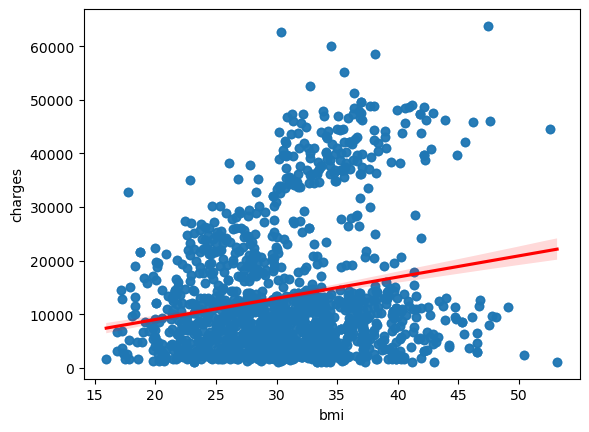

In [13]:
sns.regplot(y='charges',x='bmi',data=df,line_kws={"color": "red"})

<Axes: xlabel='smoker', ylabel='charges'>

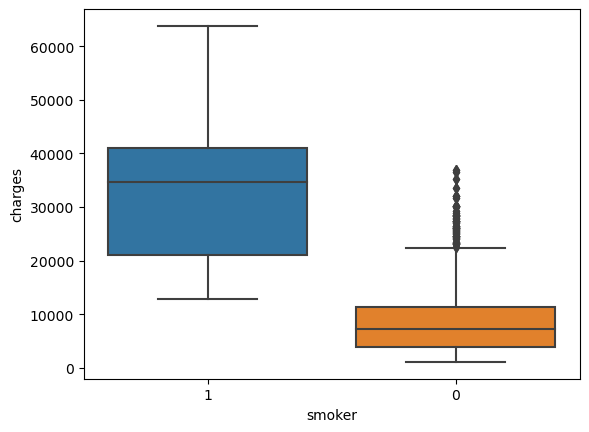

In [14]:
sns.boxplot(y='charges',x='smoker',data=df)

In [15]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026041,0.113045,0.037585,-0.023285,-0.007175,0.298622
gender,-0.026041,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113045,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037585,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023285,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007175,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298622,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [17]:
lr.fit(df[['smoker']],df[['charges']])

LinearRegression()

In [18]:
lr.score(df[['smoker']],df[['charges']])

0.6221791733924185

In [19]:
x_data=df.drop('charges', axis=1)
y_data=df[['charges']]
lr.fit(x_data,y_data)

LinearRegression()

In [20]:
lr.score(x_data,y_data)

0.7504063772187107

In [21]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Step 1: StandardScaler
    ('poly_features', PolynomialFeatures()), # Step 2: PolynomialFeatures
    ('linear_regression', LinearRegression()) # Step 3: LinearRegression
])

In [23]:
x_data.astype(float)

,age,gender,bmi,no_of_children,smoker,region
0,19.0,1.0,27.900,0.0,1.0,3.0
1,18.0,2.0,33.770,1.0,0.0,4.0
2,28.0,2.0,33.000,3.0,0.0,4.0
3,33.0,2.0,22.705,0.0,0.0,1.0
4,32.0,2.0,28.880,0.0,0.0,1.0
...,...,...,...,...,...,...
2767,47.0,1.0,45.320,1.0,0.0,4.0
2768,21.0,1.0,34.600,0.0,0.0,3.0
2769,19.0,2.0,26.030,1.0,1.0,1.0
2770,23.0,2.0,18.715,0.0,0.0,1.0


In [24]:
pipeline.fit(x_data,y_data)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [25]:
px=pipeline.predict(x_data)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_data,px)

0.8452559328188103

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=1)

In [28]:
from sklearn.linear_model import Ridge
rg=Ridge(alpha=0.1)
rg.fit(x_train,y_train)

Ridge(alpha=0.1)

In [29]:
rg.score(x_test,y_test)

0.676080246283734

In [30]:
yhat=rg.predict(x_test)

In [31]:
r2_score(y_test,yhat)

0.676080246283734

In [32]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree=2)
pol

PolynomialFeatures()

In [33]:
x_train_pl=pol.fit_transform(x_train)
x_test_pl=pol.fit_transform(x_test)

In [34]:
rg.fit(x_train_pl,y_train)

Ridge(alpha=0.1)

In [35]:
yhat2=rg.predict(x_test_pl)

In [36]:
r2_score(y_test,yhat2)

0.783563057875534

In [37]:
rg.score(x_test_pl,y_test)

0.783563057875534

# Part2

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.metrics
import sklearn.pipeline
%matplotlib inline
print('executed')

executed


In [2]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(filepath)
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [5]:
df.describe(include='all')

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10806.00000,4.580302e+09,NaN,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,NaN,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [6]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [8]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [9]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [10]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [11]:
a=df['floors'].value_counts()
dataframe=a.to_frame()
dataframe

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

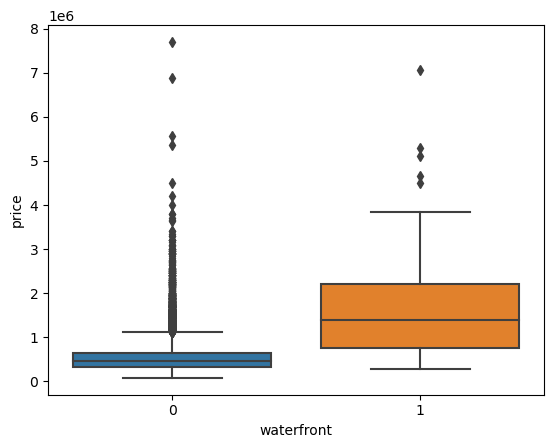

In [12]:
sns.boxplot(x='waterfront',y='price',data=df)

<Axes: xlabel='sqft_above', ylabel='price'>

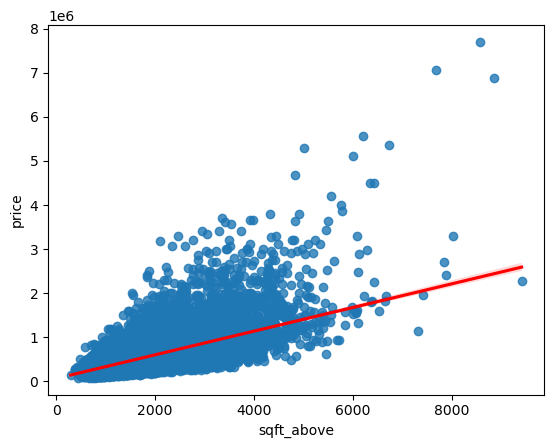

In [13]:
sns.regplot(x='sqft_above',y='price',data=df,line_kws={'color':'red'})
#postively corelated

In [14]:
df=df.drop(('date'),axis=1)

In [15]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
df.corr()['price'].sort_values

<bound method Series.sort_values of price            1.000000
bedrooms         0.308797
bathrooms        0.525738
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64>

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [22]:
x=df[['long']]
y=df[['price']]
lm.fit(x,y)
lm.score(x,y)

0.00046769430149007363

In [25]:
x1=df[['sqft_living']]
lm.fit(x1,y)

LinearRegression()

In [26]:
lm.score(x1,y)

0.4928532179037931

In [27]:
x2=df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
lm.fit(x2,y)
lm.score(x2,y)

0.6576885711683069

In [41]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [42]:
pipe.fit(x2,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [43]:
yhat=pipe.predict(x2)

In [44]:
r2_score(y,yhat)

0.7513387707402615

In [45]:
pipe.score(x2,y)

0.7513387707402615

In [52]:
from sklearn.model_selection import cross_val_score,train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.15,random_state=1)

In [57]:
x_test.shape[0]

3242

In [58]:
y_train.shape[0]

18371

In [59]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)

In [60]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [61]:
ridge.score(x_test,y_test)

0.6478759163939118

In [63]:
pol=PolynomialFeatures(degree=2)
pol

PolynomialFeatures()

In [65]:
x_train_pl=pol.fit_transform(x_train,y_train)

In [66]:
x_test_pl=pol.fit_transform(x_test,y_test)

In [68]:
ridg1=Ridge(alpha=0.1)
ridg1.fit(x_train_pl,y_train)

Ridge(alpha=0.1)

In [70]:
ridg1.score(x_test_pl,y_test)

0.7002744279539594